# **Week 6: Sampling Methods**

```
.------------------------------------.
|   __  ____  ______  _  ___ _____   |
|  |  \/  \ \/ / __ )/ |/ _ \___  |  |
|  | |\/| |\  /|  _ \| | | | | / /   |
|  | |  | |/  \| |_) | | |_| |/ /    |
|  |_|  |_/_/\_\____/|_|\___//_/     |
'------------------------------------'

```

In this workshop, we will study common sampling methods and sampling distributions, and examine the asymptotic distribution of the sample mean as the sample size increases.

## **Pre-Configurating the Notebook**

### **Switching to the R Kernel on Colab**

By default, Google Colab uses Python as its programming language. To use R instead, you’ll need to manually switch the kernel by going to **Runtime > Change runtime type**, and selecting R as the kernel. This allows you to run R code in the Colab environment.

However, our notebook is already configured to use R by default. Unless something goes wrong, you shouldn’t need to manually change runtime type.

### **Importing Required Packages**
**Run the following lines of code**:

In [2]:
#Do not modify

setwd("/content")

# Remove `MXB107-Notebooks` if exists,
if (dir.exists("MXB107-Notebooks")) {
  system("rm -rf MXB107-Notebooks")
}

# Fork the repository
system("git clone https://github.com/edelweiss611428/MXB107-Notebooks.git")

# Change working directory to "MXB107-Notebooks"
setwd("MXB107-Notebooks")

#
invisible(source("R/preConfigurated.R"))

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: stringr

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: IRdisplay

Loading required package: png

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘png’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: grid

Loading required package: knitr



**Do not modify the following**

In [3]:
if (!require("testthat")) install.packages("testthat"); library("testthat")

test_that("Test if all packages have been loaded", {

  expect_true(all(c("ggplot2", "tidyr", "dplyr", "stringr", "magrittr", "knitr") %in% loadedNamespaces()))

})

Loading required package: testthat


Attaching package: ‘testthat’


The following objects are masked from ‘package:magrittr’:

    equals, is_less_than, not


The following object is masked from ‘package:tidyr’:

    matches


The following object is masked from ‘package:dplyr’:

    matches




Test passed 🎊


## **Observational versus Experimental Data**


### **Experimental Data**

- The gold standard for collecting data is through a designed experiment, typically a randomized controlled trial (RCT).

- Subjects are selected and then randomly assigned either the treatment or a control (e.g. a placebo) and subjected to identical experimental conditions.

- As a result the effects of any other factors that might affect the experimental outcome are “cancelled” out across the treatment and control groups.

- Experimental outcomes can be assumed to be causally related to the treatment, i.e. one can infer that the variation is caused by the treatment, not merely correlated.

- Data collected in there circumstances is referred to as experimental data.

### **Observational Data**

- In cases where it is impractical or impossible to design and conduct an experiment, researchers have to rely on observational data collected by observation rather than design.

- Example of this include the use of historic data sets (actually all data is historic) like government records.
- Observational data are typically much more common and much easier to obtain in comparison to experimental data.

## **Finite-Population Non-Probability Sampling**

In this section, we will explore non-probability sampling through a series of practical discussion questions, rather than exercises or programming examples.


### **Non-Probability Sampling Schemes**

Non-probability sampling is a method of selecting units from a population through non-random, subjective procedures. This approach does not require a complete sampling frame — a list of all units in the population — making it relatively fast, convenient, and cost-effective. However, because selection is not random, the resulting sample may not accurately represent the population, and any inferences drawn are subject to potential (non-quantifiable) bias.

Common forms of non-probability sampling include sequential sampling, convenience sampling, snowball sampling, quota sampling, and purposive sampling, each of which has distinct characteristics and limitations. In particular:

- **Sequential sampling**: Samples are selected periodically from a list of potential subjects, taken one after another in sequence. These schemes sometimes resemble random sampling but lack true randomness.
- **Convenience sampling**: Subjects are chosen because they are easiest to reach, or they self-select to participate (e.g., IMDB user rankings). However, results are often unreliable due to self-selection bias.
- **Snowball sampling**: Similar to convenience sampling, except participants are asked to refer others to the study. This can expand the sample but still suffers from self-selection bias.
- **Quota sampling**: Aims to ensure demographic balance by filling pre-set quotas (e.g., 50% male, 50% female). While designed to improve representativeness, it is not random and risks over- or under-representing subgroups.
- **Purposive sampling**: Participants are deliberately selected because they fit specific characteristics or criteria relevant to the study (e.g., interviewing only experts on climate change). This method can provide rich insights but is vulnerable to researcher bias and lacks generalisability.

#### **Exercise**

Can you think of an example where snowball sampling might be useful?

Answer: A situation where person of interest is hard to track down.

For example, patients with alzhimers. You may not want to go and officialy look for alzhim patients, however you only know 1 other.

<details>
<summary>▶️ Click to show the solution</summary>

Studying the experiences of undocumented immigrants in a city can be challenging, as these individuals are often difficult to identify and may avoid official records out of fear of legal consequences.

</details>

### **Free Swimming Tickets for Everyone**

A city council wants to evaluate the health benefits of a new policy that provides free swimming tickets to residents. Participants are given tickets, and their resting heart rate is recorded before the program begins and after one year. All participants attend the sessions regularly, with no dropouts. After analysing the data, the council observes no substantial improvement in resting heart rate.

#### **Question 1**

What type of sampling method was used in this consultation?

The sampling method used in the consultation is conveince

<details>
<summary>▶️ Click to show the solution</summary>

Convenience sampling -- they are self-selecting to participate

</details>

#### **Question 2**

What are the potential problems with this sampling approach?

When using conveince sampling for self-selection, you can get self-selection bias. In this case there is a bias as the ones who are using the free swimming tickets already go to the pool. Therefore there heartrates won't increase.

<details>
<summary>▶️ Click to show the solution</summary>

Several problems can arise from this approach:

- People who accept free swimming tickets may already be health-conscious, physically active, or motivated to improve their fitness.
- Those who are less active or indifferent may ignore the offer, so the sample does not represent the general population.

</details>

#### **Question 3**

What biases could affect conclusions drawn from this online consultation?

<details>
<summary>▶️ Click to show the solution</summary>

- Self-selection bias / voluntary response bias: People who chose to participate in the swimming program may differ systematically from the general population (e.g., already health-conscious or motivated). The observed lack of heart rate improvement may not reflect the effect on the entire population.
- Coverage bias: Residents who did not accept the free tickets or were unaware of the program were excluded from the study.

</details>

### **84% Want Europe to Stop Changing the Clock**

In 2018, the European Commission conducted a public consultation on whether to end the bi-annual clock change across Europe. The consultation ran online from 4 July to 16 August and received 4.6 million responses from all 28 Member States, the highest number ever received for any Commission consultation. According to preliminary results, 84% of respondents favored stopping the clock changes, and 76% described the experience of changing clocks twice a year as “negative” or “very negative.” (see the press release [Summertime Consultation: 84% want Europe to stop changing the clock](https://ec.europa.eu/commission/presscorner/detail/en/ip_18_5302) for more details).

![Which of the following alternatives would you favour?](http://ec.europa.eu/avservices/avs/files/video6/repository/prod/photo/store/store2/9/P037989-973692.jpg)


![What is your overall experience with the clock change?](http://ec.europa.eu/avservices/avs/files/video6/repository/prod/photo/store/store2/9/P037989-904263.jpg)



#### **Question 1**

What type of sampling method was used in this consultation?

The sampling method used was conveince sampling as they used self-selection

<details>
<summary>▶️ Click to show the solution</summary>

Convenience sampling -- they are self-selecting to participate

</details>

#### **Question 2**

Why might the results not accurately represent the views of all European citizens?

Only those with strong opinions would participate whilst those who don't mind wouldn't be part of the consultation.

<details>
<summary>▶️ Click to show the solution</summary>

- European citizens who are highly motivated or have strong opinions about the clock change (especially those annoyed by it) were more likely to respond.
- Many citizens who are indifferent or less engaged may not have participated.

</details>

#### **Question 3**

What biases could affect conclusions drawn from this online consultation?

Coverage Bias - Older people may not be familiar with technology, so won't have the knowledge to partipate in the consulation.

Self-Selection Bias - Those with strong opinions on the clock changes would be partipating more in the study than those who don't mind.

<details>
<summary>▶️ Click to show the solution</summary>

- Self-selection bias/voluntary response bias: Strong opinions are overrepresented. The 84% figure likely overestimates support for ending clock changes compared to the general population.
- Coverage bias: Citizens without internet access or awareness of the consultation were excluded.

While the survey collected millions of responses, the large sample size does not guarantee representativeness. Any conclusions drawn should be treated cautiously.

</details>

#### **Question 4**

Can you think of an example of a survey that might suffer from the same type of bias as the online consultation?

<details>
<summary>▶️ Click to show the solution</summary>

An online survey titled "Who Do You Think Will Win the Next US Election?" published on the website of a political party. Respondents are likely to be party supporters, which can lead to an overrepresentation of strong opinions and a sample that does not accurately reflect the views of the general population.

</details>


## **Finite-Population Probability Sampling**

If the sampling frame is available, we can use a **probability-based** sampling method, where the probability of selecting each observation is known in advance. As a result, it is possible to quantify bias, as well as evaluate, validate, and compare different sampling methods. Details on this topic are beyond the scope of this unit.

### **Simple Random Sampling**


Simple random sampling (SRS) is a common method where each unit in the population has an equal chance of being selected, and all possible samples of a given size are equally likely.


There are two main SRS schemes:
- SRS Without Replacement (SRSWOR): Each unit in the population can be selected only once. Once a unit is chosen, it is removed from the pool of possible selections.
- SRS With Replacement (SRSWR): Each unit can be selected multiple times, independently of previous selections. This means that after a unit is chosen, it is “put back” into the population, so it is still available for subsequent draws.

SRSWR is a bit less efficient than SRSWOR as it may select the same observation multiple times. However, SRSWR is mathematically simpler to work with because each draw is independent.

#### **Mean Estimation**

For a simple random sample of size $n$ with observations $x_1, x_2, \dots, x_n$ (from a population $X$ of size $N$), the **sample mean** is  

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i.
$$

This is an **unbiased estimator** of population mean if the sampling frame is complete.

#### **R Examples**

To perform simple random sampling in R, we can use the `sample(x, size, replace, prob)` function, where:

- `x`: a vector of values to sample from
- `size`: the number of items to select
- `replace`: whether or not to perform sampling with replacement. By default, `replace = FALSE`.
- `prob`: an optional vector of probability weights for elements in `x`. By default, all elements are equally likely.

If `replace = TRUE`, `size` cannot be greater than `length(x)`.

The `sample()` function does not work directly on data frames. Take the `iris` dataset as an example.

In [3]:
iris %>%
  str()

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


Suppose we want to select 6 observations from `iris` using SRSWOR. First, we need to sample the row indices using `sample()`.

In [5]:
set.seed(1)
nr = nrow(iris)
rowIdx = 1:nr
smplIdx = sample(rowIdx, 6)
smplIdx %>% print()

[1]  68 129  43  14  51  85


Then, we can use these indices to extract the corresponding rows.

In [6]:
iris %>%
  slice(smplIdx)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.8,2.7,4.1,1.0,versicolor
6.4,2.8,5.6,2.1,virginica
4.4,3.2,1.3,0.2,setosa
4.3,3.0,1.1,0.1,setosa
7.0,3.2,4.7,1.4,versicolor
5.4,3.0,4.5,1.5,versicolor


The `dplyr` package provides a built-in function called `slice_sample()`, which allows you to perform row-wise sampling directly on a data frame, similar to `sample()`.

In [7]:
set.seed(1)
iris %>%
  slice_sample(n = 6, replace = FALSE)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.8,2.7,4.1,1.0,versicolor
6.4,2.8,5.6,2.1,virginica
4.4,3.2,1.3,0.2,setosa
4.3,3.0,1.1,0.1,setosa
7.0,3.2,4.7,1.4,versicolor
5.4,3.0,4.5,1.5,versicolor


Another option is to use `sample_n()`, which is older and now soft-deprecated. Unlike `slice_sample()`, however, `sample_n()` allows the use of `n()` within its call.

In [ ]:
set.seed(1)
iris %>%
  sample_n(size = 6, replace = FALSE)

In [ ]:
set.seed(1)
iris %>%
  sample_n(size = 1/25*n(), replace = FALSE)

#### **Exercise**

Planet Zog has 1,250 citizens, divided into 9 districts. The locations `(x,y)` of each citizen and their district are stored in the `planetZog` dataset.

- Count the number of citizens in each district.
- The planet wants to randomly select 25 citizens from Zog to respond to a survey. Use SRSWOR and save the resulting data frame as `smpl_Zog`.
- Visualise the locations of the citizens using `geom_point()`, coloured by `District`.
- Overlay the sampled data points, displayed in `black` colour, on the existing plot.
- Repeat the sampling process several times and observe the results. What problem do you notice with this sampling approach?

**Hint**: You can use a different dataset in `geom_point()` via the `data` argument, specify a separate `aes()` and `colour` for it, and overlay layers by stacking multiple `geom_point()` blocks.”

In [4]:
planetZog = read.csv("./datasets/zog_planet.csv")
planetZog %>% str()

'data.frame':	1250 obs. of  4 variables:
 $ x       : num  0.955 1.122 1.036 1.04 1.011 ...
 $ y       : num  1.022 1.038 0.95 0.967 0.898 ...
 $ District: chr  "Lala" "Lala" "Lala" "Lala" ...
 $ Height  : num  167 163 166 160 164 ...


District,Count
<chr>,<int>
Archie,250
Bop,50
Cam,50
Connie,50
Lala,50
Maui,250
Natnat,50
Rosie,250
Tatiana,250


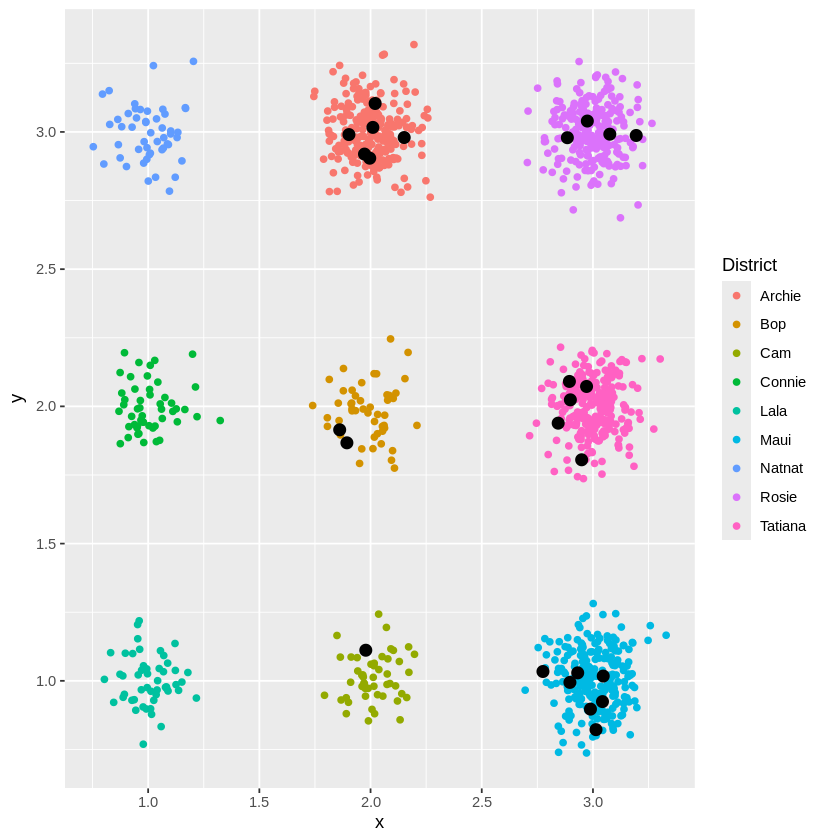

In [32]:
planetZog %>%
  group_by(District) %>%
  summarise( Count = n())

planetZog %>%
  slice_sample(n = 25, replace = FALSE) -> smpl_Zog

planetZog %>%
  ggplot(aes(x = x, y = y, colour = District)) +
geom_point() +
geom_point(data = smpl_Zog, aes(x = x, y = y), colour = "black", size = 3)

# Looking at the generated dotplot we can see that not all of the districts are being
# Represented in this sample.

<details>
<summary>▶️ Click to show the solution</summary>


```r
planetZog = read.csv("./datasets/zog_planet.csv")

planetZog %>%
  group_by(District) %>%
  summarise(nrCitizens = n()) %>%
  kable()

planetZog %>%
  slice_sample(n = 25) -> smpl_Zog

planetZog %>%
  ggplot(aes(x = x, y = y, colour = District)) +
  geom_point(size = 2) +
  geom_point(data = smpl_Zog, aes(x = x, y = y), colour = "black", size = 3)
```
After running the sampling several times, you will observe that:
- The number of selected observations from each district is not proportional to that district’s population size.
- Quite often, some districts end up with zero selected citizens.

</details>


### **Stratified Random Sampling**

Stratified random sampling (StRS) is a method in which the population is first divided into non-overlapping subgroups, called strata, that are ideally internally homogeneous with respect to some characteristic and heterogeneous between strata. Within each stratum, a random sample is then drawn, often using SRS (usually without replacement).

This approach ensures representation from all subgroups and can improve precision compared to simple random sampling.

There are two main ways to allocate the sample across strata:

- Proportional allocation: The sample size from each stratum is proportional to the stratum’s population size. This preserves the overall population structure.
- Equal or optimal allocation: The sample sizes may be adjusted based on variability within strata or for specific analysis goals.

Sometimes, the stratum sample size $n_h$ is not an integer and needs to be rounded, typically using the ceiling function. As a result, the total sample size may not be exactly $n$, but it will be close.

We will only focus on proportional allocation in this workshop.

#### **Mean Estimation**

Suppose a population of size $N$ is divided into $H$ strata, with stratum $h$ having size $N_h$. From each stratum, we draw a simple random sample of size $n_h$, giving observations $x_{h1}, x_{h2}, \dots, x_{h n_h}, h = 1, 2, \dots, H.$

The stratified sample mean is

$$
\bar{x}_{\text{st}} = \sum_{h=1}^{H} \frac{N_h}{N} \bar{x}_h,
$$

where

$$
\bar{x}_h = \frac{1}{n_h} \sum_{i=1}^{n_h} x_{hi}
$$

is the sample mean within stratum $h$, and $N = \sum_{h=1}^H N_h$ is the total population size.

This is an **unbiased estimator** of population mean if the sampling frame is complete.

#### **R Examples**

There is no built-in function for stratified random sampling in R. One option is to create sub-datasets for different strata and perform SRS on each of these.

Back to the `iris` example. Suppose we want to randomly select 6 observations. Since the dataset contains 3 species with equal numbers of observations, we might want to select 2 observations from each species. In this case, stratified random sampling can be used to ensure that the sample is balanced across species.

First, we create sub-datasets for different iris species.

In [33]:
iris %>% select(Species) %>% unique() %>% print()
iris %>% filter(Species == "setosa") -> setosa
iris %>% filter(Species == "versicolor") -> versicolor
iris %>% filter(Species == "virginica") -> virginica

       Species
1       setosa
51  versicolor
101  virginica


Then, SRSWOR is performed within each species.

In [34]:
setosa %>% slice_sample(n = 2) -> smpl_setosa
versicolor %>% slice_sample(n = 2) -> smpl_versicolor
virginica %>% slice_sample(n = 2) -> smpl_virginica

It is clear that this method becomes time-consuming and cumbersome when there are many strata. Fortunately, we can use `group_by() %>% slice_sample()` to perform stratified random sampling efficiently.

In [35]:
iris %>%
  group_by(Species) %>%
  slice_sample(n=2)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.5,4.2,1.4,0.2,setosa
5.3,3.7,1.5,0.2,setosa
6.1,3.0,4.6,1.4,versicolor
6.1,2.8,4.0,1.3,versicolor
7.7,3.8,6.7,2.2,virginica
6.3,2.9,5.6,1.8,virginica


One particular disadvantage of `slice_sample()` is that it requires `n` to be a constant. On the other hand, `sample_n()` is more flexible and allows different stratum sample sizes.

#### **Exercises**

##### **Exercise 1**

The dataset `iris_unbalanced` is extracted from the original `iris` dataset. In this version, the number of observations for each species is no longer equal.

Write R code to perform StRS with proportional allocation to select 20 observations from `iris_unbalanced`

**Hint**:
- Assign the number of observations in `iris_unbalanced` to a variable.
- Use the `ceiling(x)` function to compute the ceiling value of `x`.
-  `n()` cannot be used within `slice_sample()`.

In [4]:
iris_unbalanced= read.csv("./datasets/iris_unbalanced.csv")
iris_unbalanced %>% str()

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.4 4.6 5.4 4.9 4.8 4.3 5.2 5.8 5.3 5.1 ...
 $ Sepal.Width : num  3.4 3.4 3.7 3.6 3 3 3.4 4 3.7 3.5 ...
 $ Petal.Length: num  1.5 1.4 1.5 1.4 1.4 1.1 1.4 1.2 1.5 1.4 ...
 $ Petal.Width : num  0.4 0.3 0.2 0.1 0.1 0.1 0.2 0.2 0.2 0.2 ...
 $ Species     : chr  "setosa" "setosa" "setosa" "setosa" ...


In [21]:
iris_size = nrow(iris_unbalanced)
sampleNum = 20

iris_unbalanced %>%
  group_by(Species) %>%
  sample_n(size = ceiling(n()/iris_size * sampleNum))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
4.6,3.4,1.4,0.3,setosa
5.2,3.4,1.4,0.2,setosa
4.8,3.0,1.4,0.1,setosa
5.1,3.5,1.4,0.2,setosa
6.7,3.1,4.4,1.4,versicolor
6.1,3.0,4.6,1.4,versicolor
6.1,2.8,4.0,1.3,versicolor
5.7,2.8,4.5,1.3,versicolor
5.7,3.0,4.2,1.2,versicolor


<details>
<summary>▶️ Click to show the solution</summary>


```r
N = nrow(iris_unbalanced)
smplSize = 20

iris_unbalanced %>%
  group_by(Species) %>%
  sample_n(size = ceiling(smplSize*n()/N)) -> smpl_iris_unbalanced
```

</details>


##### **Exercise 2**


Zog citizens are not happy with the previous sampling method. They request that the number of selected citizens from each district be proportional to the district’s population size.
- Choose an appropriate sampling method in R to carry out this task.
- Use the resulting sample to estimate the average population height.

**Hint**: Create a new column storing the stratum sizes.

In [102]:
# An appropriate sampling method would be to use STRSWR (Stratified Random Sampling Without Replacement)
# take a sample of 25 citizens from different Districts
# Make the Stratum the districts and take SRS from each of the stratums. Ensure to adjust the sample by the proportion.
set.seed(123)

totalPopulation = nrow(planetZog)
sampleNum = 25

planetZog %>%
  group_by(District) %>%
  mutate(stratumSize = n()) %>%
  sample_n(size = ceiling(sampleNum * n()/totalPopulation)) %>%
  summarise(StratumAvgHeight = mean(Height),
            stratumSize = stratumSize[1]) %>%
  ungroup() %>%
  summarise(PopulationAvg = sum((StratumAvgHeight * stratumSize) / totalPopulation))

PopulationAvg
<dbl>
171.2551


<details>
<summary>▶️ Click to show the solution</summary>


```r
N = nrow(planetZog)
smplSize = 25

planetZog %>%
  group_by(District) %>%
  mutate(Nh = n()) %>% #stratum sizes
  sample_n(size = ceiling(smplSize*n()/N)) %>%
  summarise(stratumAvgHeight = mean(Height),
            Nh = Nh[1]) %>%
  ungroup() %>%
  summarise(popAvgHeight = sum(stratumAvgHeight*Nh)/sum(Nh))
```

</details>


### **Cluster Sampling**

In one-stage cluster sampling, the population is divided into non-overlapping clusters, and a random sample of clusters is selected (typically using SRSWOR). All units within the chosen clusters are included in the sample.

If desired, one can also perform SRS within clusters, which leads to two-stage cluster sampling.

- This method is simple and cost-effective, especially for populations that are large or geographically dispersed.
- Cluster sampling is generally less efficient than SRS or stratified random sampling (this is beyond the scope of this unit).

#### **Mean Estimation**

Suppose a population of size $N$ is divided into $C$ clusters, with cluster $c$ having size $M_c$. From the population, we draw a simple random sample of $n_c$ clusters, giving observations

$$
x_{c1}, x_{c2}, \dots, x_{c M_c}, \quad c = 1, 2, \dots, n_c.
$$

The **one-stage cluster sample mean** is

$$
\bar{x}_{\text{cluster}} = \frac{1}{n_c} \sum_{c=1}^{n_c} \bar{x}_c,
$$

where

$$
\bar{x}_c = \frac{1}{M_c} \sum_{i=1}^{M_c} x_{ci}
$$

is the mean of all units within the selected cluster $c$.  

This is an **unbiased estimator** of the population mean if the clusters are randomly selected and the sampling frame is complete.

The formula for two-stage cluster sample mean is generally similar, except that we compute sample mean within each cluster instead.


#### **R Example**

Cluster sampling is somewhat more involved than SRS or StRS in terms of implementation. One-stage cluster sampling is straightforward: we first select the clusters and then include all units within those clusters.

For two-stage cluster sampling, an additional step is required, where a sample of units is drawn from each selected cluster.

**One-stage cluster sampling**:

In [108]:
set.seed(1)
#Randomly select 3 districts
#Use `pull()` to extract `District` as a vector
planetZog %>% distinct(District) %>% sample_n(size = 3) %>% pull(District) -> selectedDistricts

planetZog %>%
  filter(District %in% selectedDistricts) -> smpl_Zog

**Two-stage cluster sampling**:

In [110]:
set.seed(1)
#Randomly select 3 districts
planetZog %>% distinct(District) %>% sample_n(size = 3) %>% pull(District) -> selectedDistricts

#Randomly select 5 observations within each selected district
planetZog %>%
  filter(District %in% selectedDistricts) %>%
  group_by(District) %>%
  sample_n(size = 5) -> smpl_Zog
smpl_Zog

x,y,District,Height
<dbl>,<dbl>,<chr>,<dbl>
1.970484,0.9920788,Cam,169.1311
2.129408,1.0704167,Cam,172.8064
2.031406,0.9493666,Cam,170.4492
1.900630,0.9217798,Cam,170.6367
1.867705,0.9301579,Cam,168.7507
3.162266,0.9231676,Maui,174.2648
3.050570,1.0813279,Maui,177.6958
3.052541,0.8595454,Maui,175.2007
3.089954,0.8285512,Maui,176.9599


## **i.i.d. Sampling**


In most classical sampling scenarios, we assume that the observations in a sample are **independent and identically distributed (i.i.d.)**.  

- **Independent**: the value of one observation does not affect another.  
- **Identically distributed**: all observations come from the same underlying population distribution.  

Formally, if $X_1, X_2, \dots, X_n$ are i.i.d. random variables from population $X$, then each $X_i \sim F_X$ and  

$$
P(X_1 \le x_1, \dots, X_n \le x_n) = \prod_{i=1}^{n} P(X_i \le x_i).
$$  

An example of i.i.d. sampling is SRSWR, where we repeatedly draw units from the same finite population, and each draw is independent and identically distributed.

An example of non i.i.d. sampling is SRSWOR. In this case, the draws are no longer independent, because selecting one unit changes the probabilities of selecting the remaining units. As a result, the observations are dependent, and the i.i.d. assumption does not hold.



#### **Different Perspectives of i.i.d. Sampling**

It is important to note that finite-population sampling and i.i.d. sampling are not fundamentally different. They simply represent different perspectives. Consider the example of estimating the average height of Zog citizens given a SRSWR sample:

- Finite-Population Perspective: Heights are viewed as a sample drawn from the population of all people in Zog. The goal is to estimate the population mean of height.

- Model-Based (i.i.d.) Perspective: Heights of individuals in both the Zog population and the sample are considered realisations of a random variable (or a data-generating process) $X$. The goal is to estimate the $X$ and study the distribution of heights through this probabilistic model.

## **Sampling Distribution**

When we collect data as a sample of size $n$ from a population $X$, we can then calculate some sample statistics as an estimate of population-level characteristics or parameters. But because these statistics are functions of random variables, **the resulting statistics are also random variables** and are thus are subject to interpretation via probabilistic inference via their sampling distribution.

The sampling distribution of a statistic describes how the statistic varies across repeated samples from the same population. It allows us to evaluate statistical methods (like probability sampling methods) and forms the basis for statistical inference.

For non-probability sampling methods, a formal sampling distribution does not exist (as the probability of selecting each observation is not known). Consequently, it is not possible to quantify or correct for bias in the estimates.



### **Deriving Sampling Distribution**

The sampling distribution theoretically arises when taking repeated random samples of size $n$ from a population. Typically is derived in one of three ways:

- Mathematical derivation directly from the probability distribution of the data and the laws of probability.

- Simulation-based methods where the sampling distribution can be approximated by taking repeated samples and making an empirical estimate of the probability distribution.

- Asymptotic approximation, where under certain theorems and properties of the sample statistics, as $n$ increases, it is reasonable to assume properties of the sampling distribution.

In this workshop, we focus mostly on simulation-based methods and asymptotic approximation of the sampling distribution of the sample mean via the central limit theorem.


### **Asymptotic Sampling Distribution of the Sample Mean**


The **Central Limit Theorem (CLT)** is one of the most important theorems in statistics. It provides a powerful tool for making inferences about the **population mean** or expected value based on sample statistics.  

Formally, for i.i.d. sample of size $n$ drawn from any probability distribution with mean $\mu$ and variance $\sigma^2$:  

$$
\displaystyle \frac{\sqrt{n} (\bar{x} - \mu)}{\sigma} \;\;\; \stackrel{d}{\longrightarrow} \;\; \mathcal{N}(0,1),
$$  

In simpler terms, as $n$ increases, the **sampling distribution of the sample mean** $\bar{x}$ converges to a **normal distribution** with mean $\mu$ and variance $\sigma^2 / n$.









In practice, when the sample size $n$ is sufficiently large, the **CLT approximation** can be applied.
$$
\displaystyle \bar{x} \approx \mathcal{N}\Big(\mu, \frac{\sigma^2}{n}\Big).
$$  

How large $n$ needs to be depends on various factors, such as the **skewness** of the population distribution. A common rule of thumb is that if

$$
n > 25 \times (\text{skewness})^2,
$$

the normal approximation is reasonable (see [Sampling Techniques, 3rd Edition | Wiley](https://www.wiley.com/en-us/Sampling+Techniques%2C+3rd+Edition-p-9780471162407). Here, the **skewness** can be estimated from the data.

Another common rule of thumb is that if

$$
n > 30,
$$

the normal approximation is reasonable. However, it is less precise when data are heavily skewed.

#### **Examples**

##### **How Large Should `n` Be?**

First, we will visually demonstrate the CLT for populations with different skewness levels. For each example, we will draw 10,000 samples, and compute the sample mean for each, forming the estimated sampling distribution of the sample mean.

**Squared standard Gaussian**:

[1] "skewness(x)^2*25 = 194.792585668007"


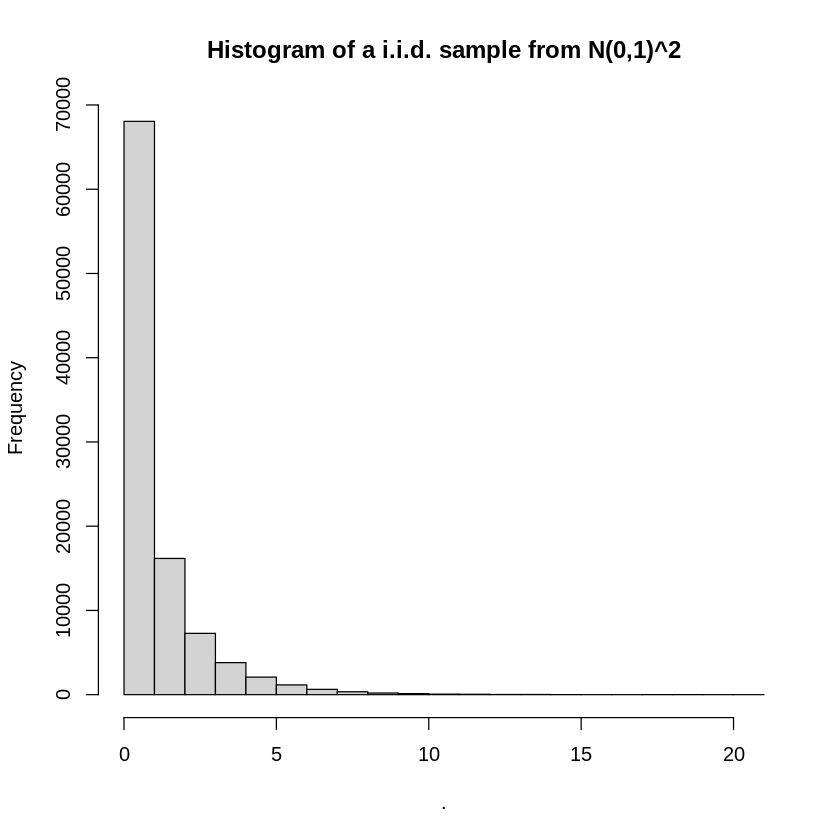

In [111]:
set.seed(1)

x = rnorm(10^5)^2 #Draw random sample of size 10^5 from N(0,1)^2
print(paste0("skewness(x)^2*25 = ", skewness(x)^2*25))
x %>% hist(main = "Histogram of a i.i.d. sample from N(0,1)^2")

This suggests that we need a sample size of at least `195`

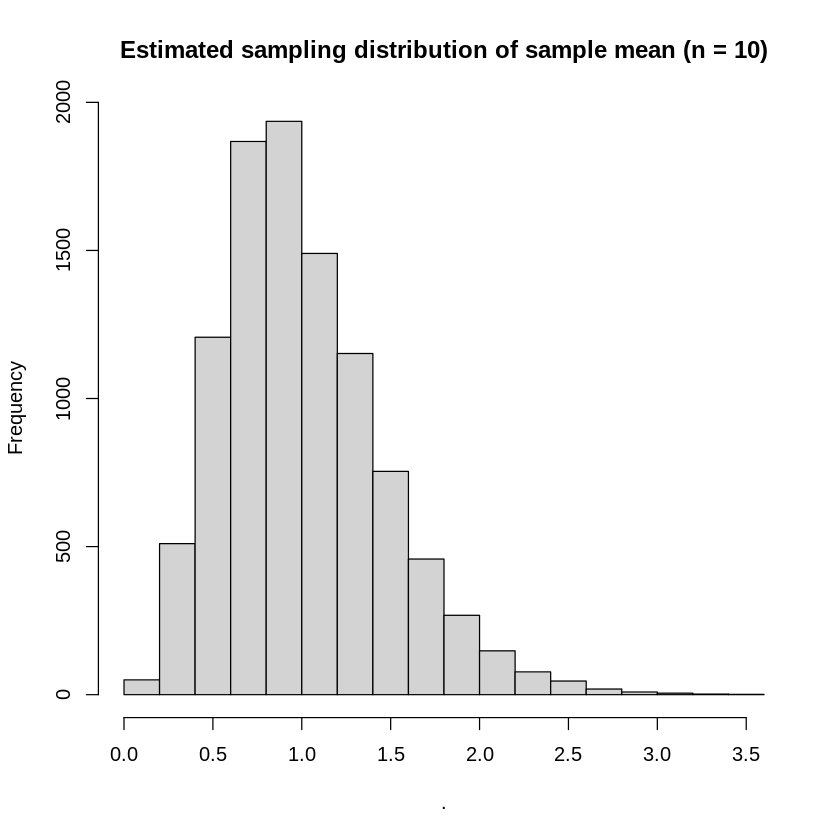

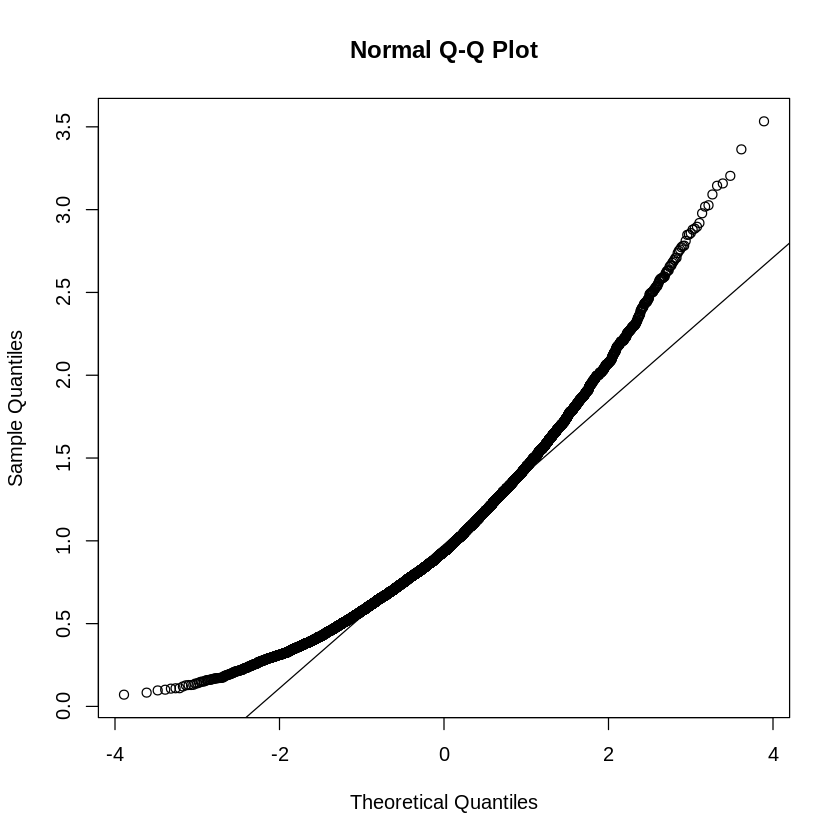

In [112]:
set.seed(1)

smpl_mean = numeric(10^4)

for(i in 1:10^4){
  x = rnorm(10)^2
  smpl_mean[i] = mean(x)
}
smpl_mean %>% hist(breaks = 15, main = "Estimated sampling distribution of sample mean (n = 10)")

qqnorm(smpl_mean)
qqline(smpl_mean)

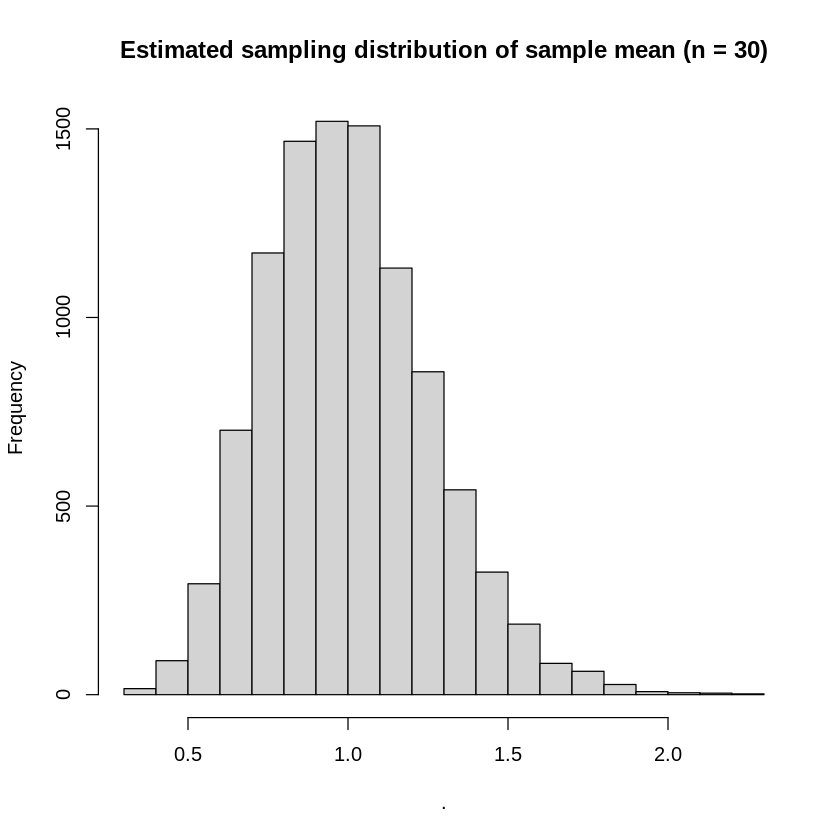

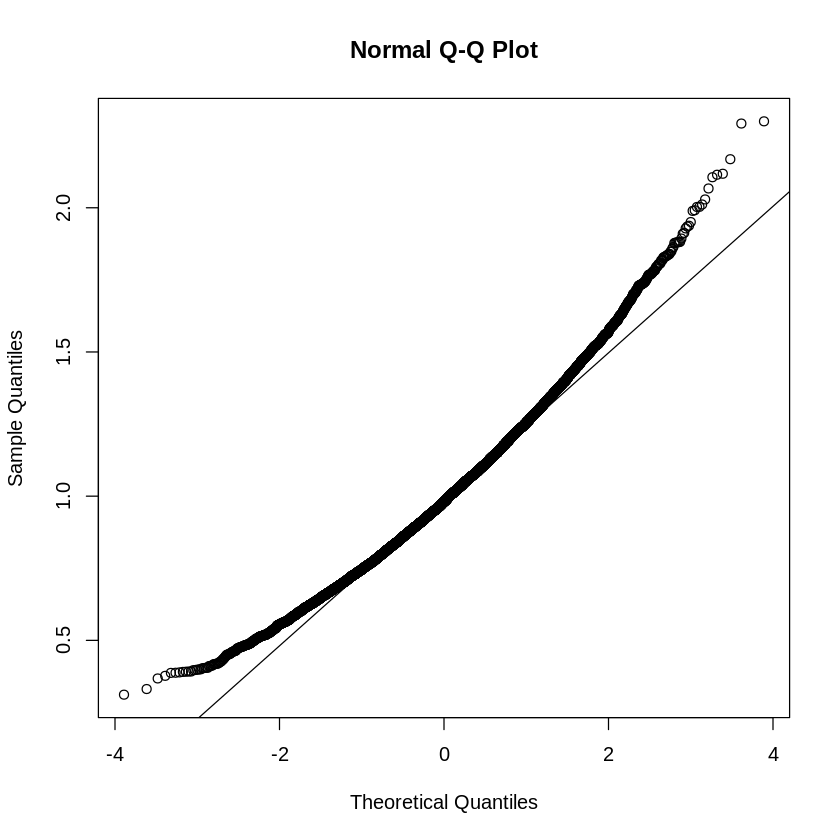

In [113]:
set.seed(1)

smpl_mean = numeric(10^4)

for(i in 1:10^4){
  x = rnorm(30)^2
  smpl_mean[i] = mean(x)
}
smpl_mean %>% hist(breaks = 15, main = "Estimated sampling distribution of sample mean (n = 30)")

qqnorm(smpl_mean)
qqline(smpl_mean)

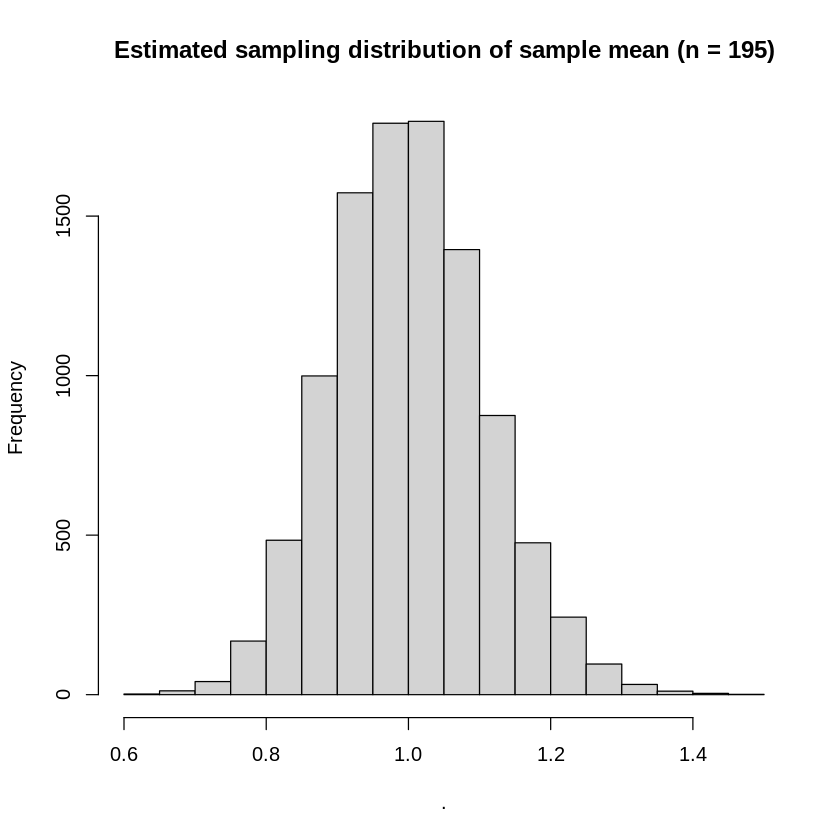

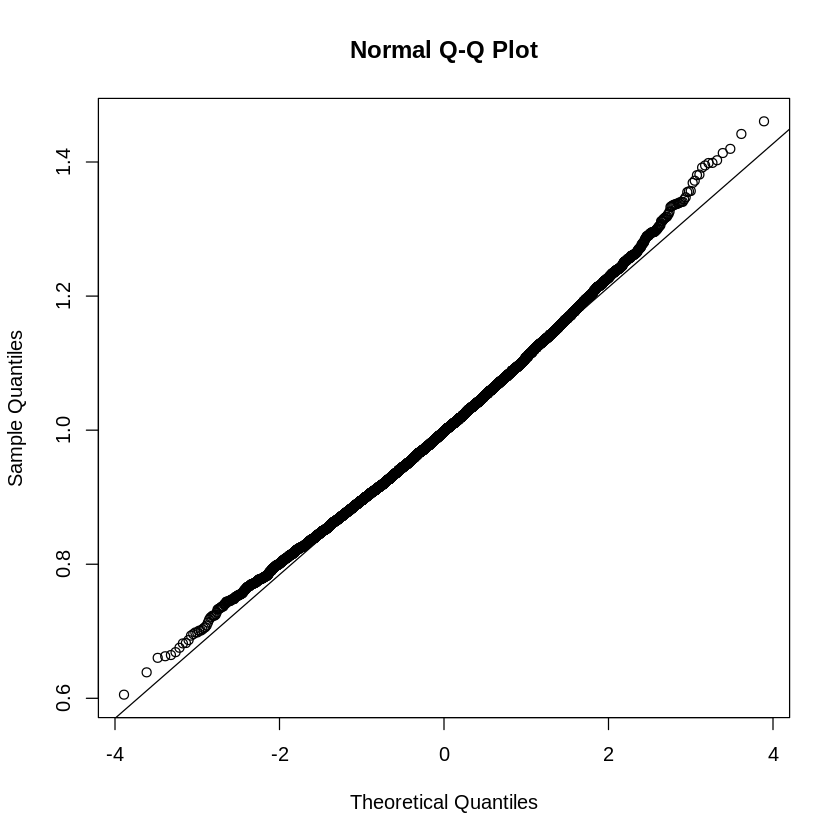

In [114]:
set.seed(1)

smpl_mean = numeric(10^4)

for(i in 1:10^4){
  x = rnorm(175)^2
  smpl_mean[i] = mean(x)
}
smpl_mean %>% hist(breaks = 15, main = "Estimated sampling distribution of sample mean (n = 195)")
qqnorm(smpl_mean)
qqline(smpl_mean)

**Poisson(3)**

[1] "skewness(x)^2*25 = 8.16637733351932"


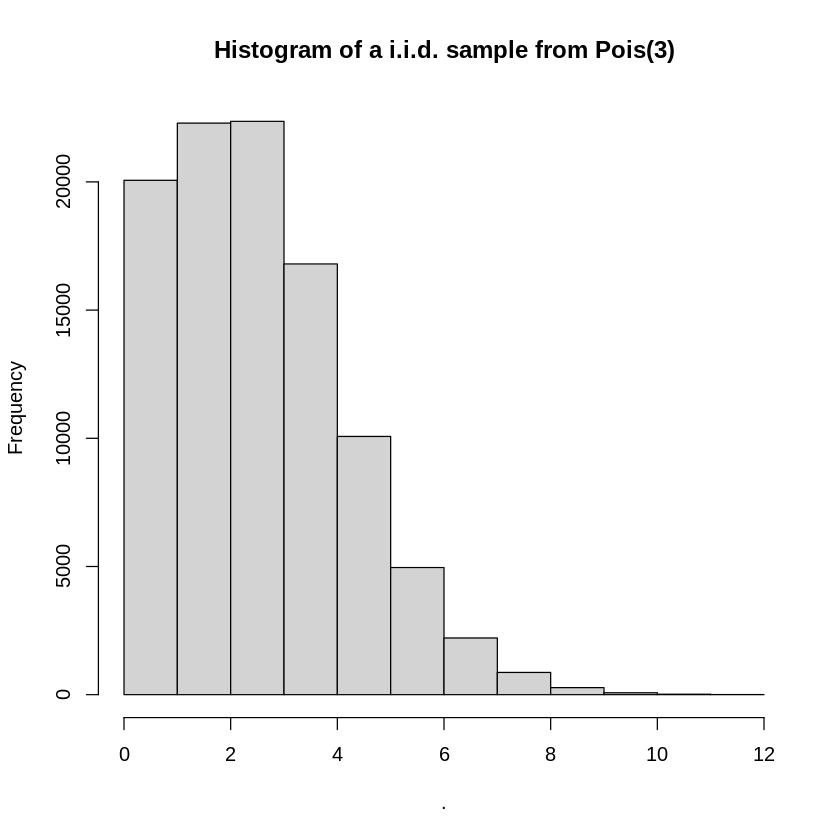

In [115]:
set.seed(1)

x = rpois(10^5, 3)
print(paste0("skewness(x)^2*25 = ", skewness(x)^2*25))
x %>% hist(breaks = 15, main = "Histogram of a i.i.d. sample from Pois(3)")

This suggests that we need a sample size of 8 for the CLT to hold.

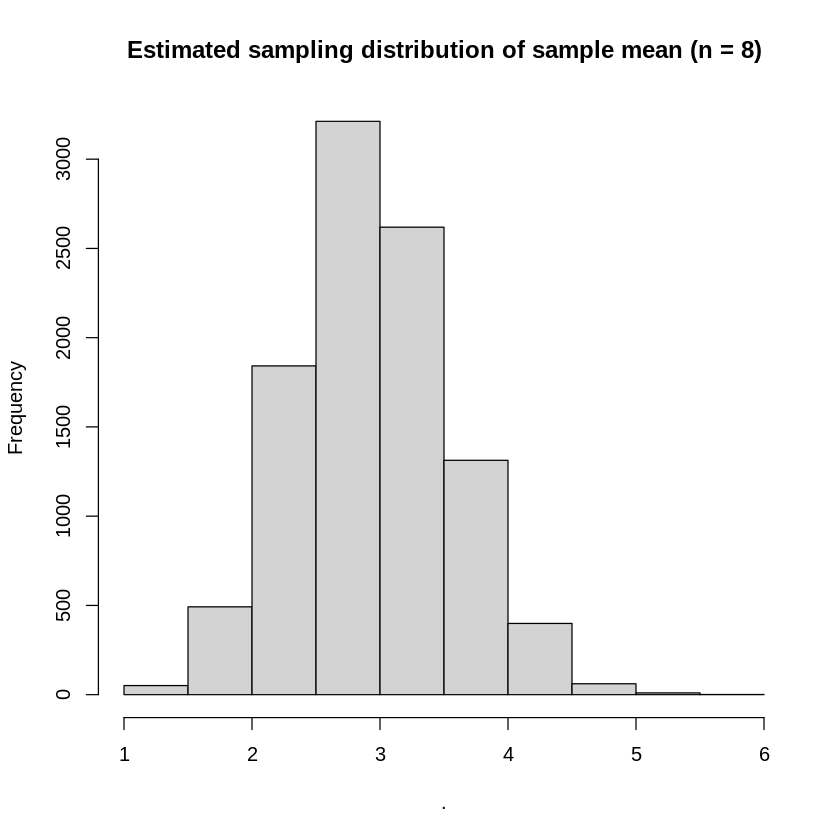

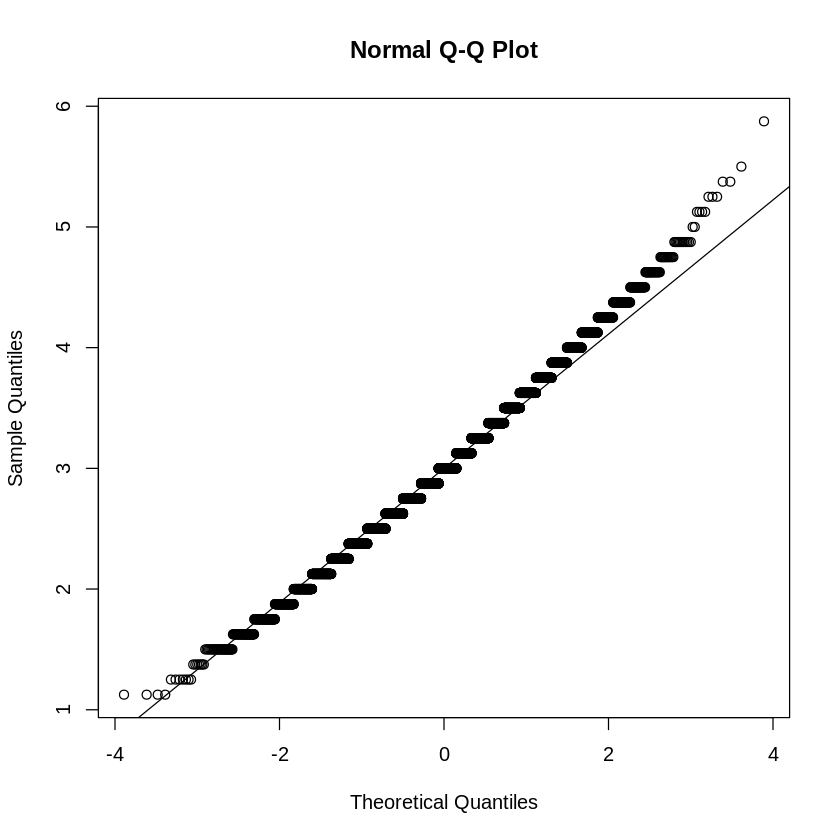

In [116]:
set.seed(1)

smpl_mean = numeric(10^4)

for(i in 1:10^4){
  x = rpois(8, 3)
  smpl_mean[i] = mean(x)
}
smpl_mean %>% hist(breaks = 15, main = "Estimated sampling distribution of sample mean (n = 8)")
qqnorm(smpl_mean)
qqline(smpl_mean)

**Poisson(10)**

[1] "skewness(x)^2*25 = 2.62457652332991"


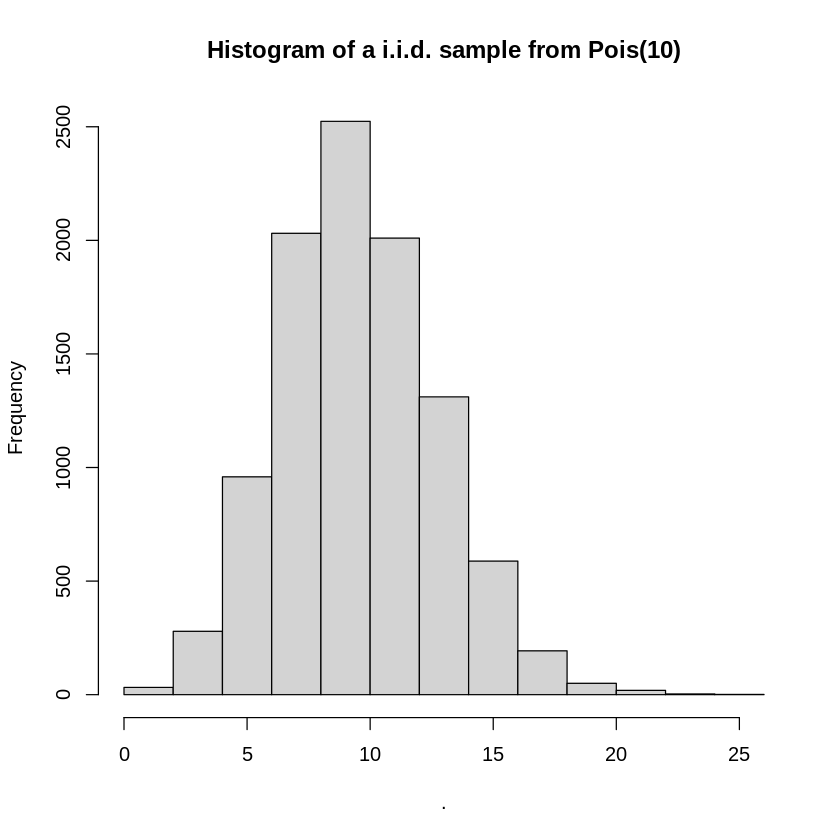

In [117]:
set.seed(1)

x = rpois(10^4, 10)
print(paste0("skewness(x)^2*25 = ", skewness(x)^2*25))
x %>% hist(breaks = 15,main = "Histogram of a i.i.d. sample from Pois(10)")


This suggests that we only need a sample size of 3 for the CLT to hold!!!

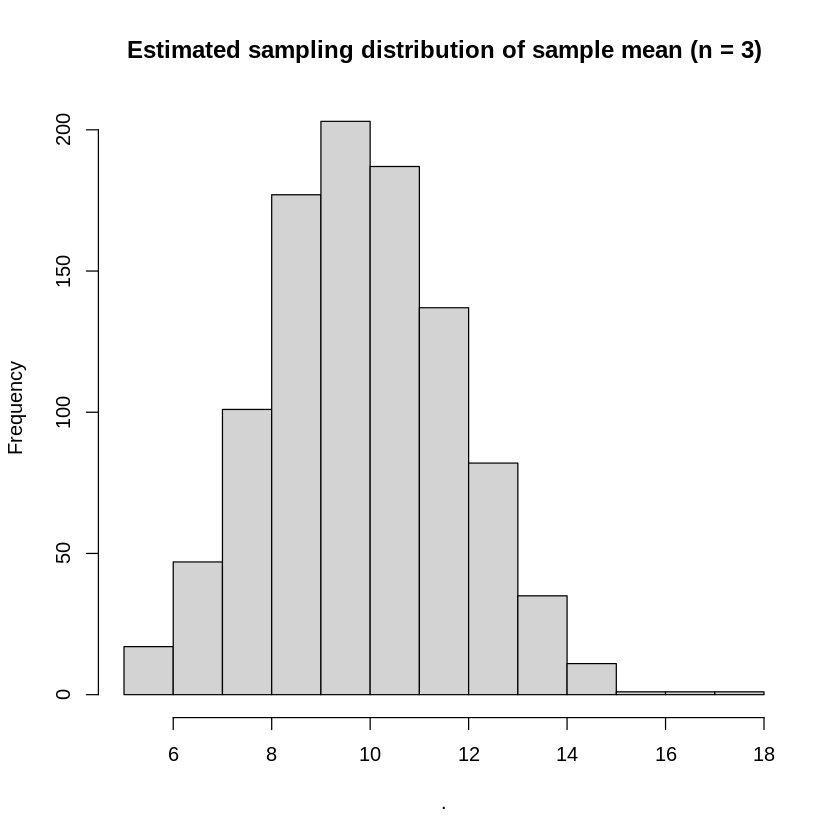

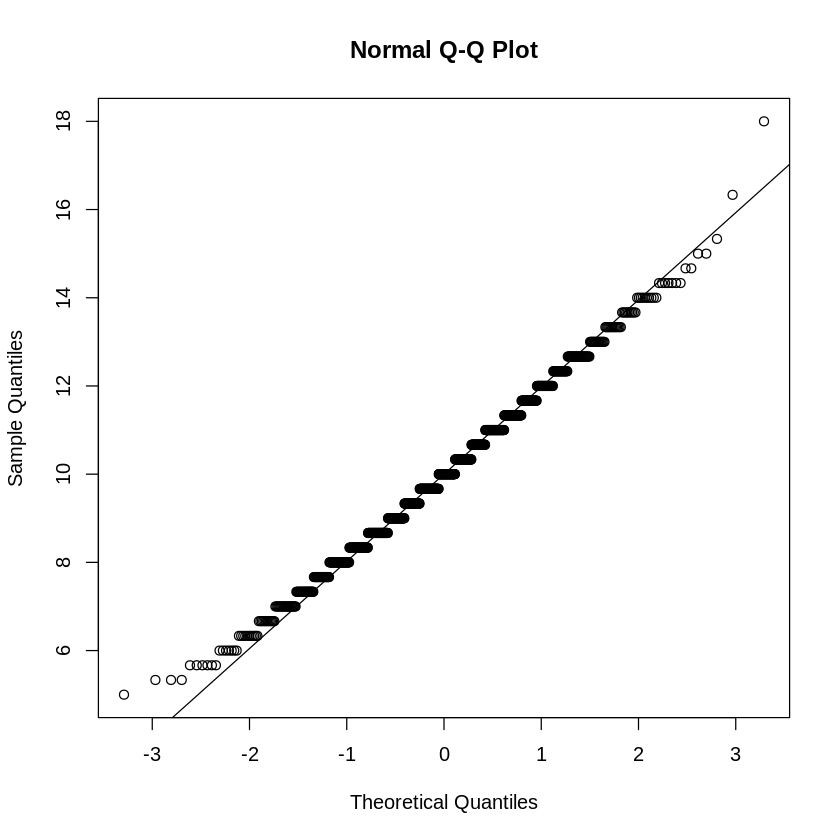

In [118]:
set.seed(1)

smpl_mean = numeric(1000)

for(i in 1:1000){
  x = rpois(3, 10)
  smpl_mean[i] = mean(x)
}
smpl_mean %>% hist(breaks = 15, main = "Estimated sampling distribution of sample mean (n = 3)")
qqnorm(smpl_mean)
qqline(smpl_mean)

It is obvious that if the true data-generating process is Gaussian then we only need a sample size of 1 for the CLT to hold (since the average of an iid Gaussian random sample is still Gaussian!).

[1] "skewness(x)^2*25 = 0.00101165501959315"


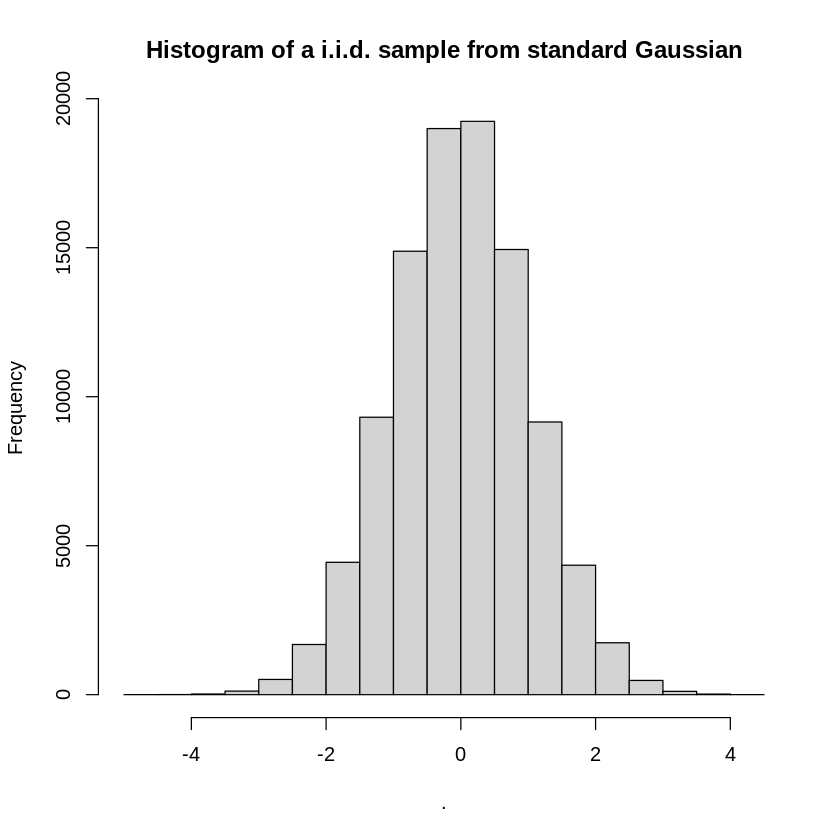

In [119]:
set.seed(1)

x = rnorm(10^5)
print(paste0("skewness(x)^2*25 = ", skewness(x)^2*25))
x %>% hist(breaks = 15, main = "Histogram of a i.i.d. sample from standard Gaussian")

##### **Estimating the Probability of $a < \bar{x} < b$**

A beverage plant calibrates a bottling machine to fill 33 cL bottles, but there is some variability in the process, and from time to time, the machine needs adjustment. Every hour, an employee takes a sample of ten bottles and measures the amount of beverage in each one to monitor the machine. Prior testing shows that the volume of each bottle has a mean of 33 cL and a variance of 0.6 cL. What is the (approximate) probability of observing a sample mean of $\bar{x}\leq 32.7$ cL based on a sample of \(n=10\) bottles?




The sampling distribution of the sample mean $\bar{x}$ is  

$$
\displaystyle
\bar{x} \sim \mathcal{N}\big(\mu, \sigma^2/n\big) \sim \mathcal{N}(33, 0.6/10).
$$

So $\Pr(\bar{x} \le 32.7)$ can be found using the standard normal distribution:  

$$
\displaystyle
\begin{aligned}
\Pr(\bar{x} \le 32.7)
&= \Pr\Bigg(\frac{\bar{x}-\mu}{\sigma/\sqrt{n}} \le \frac{32.7-33}{\sqrt{0.6/10}}\Bigg) \\
&= \Pr(Z \le -1.22) \\
&\approx 0.11.
\end{aligned}
$$

This probability can be obtained from standard normal tables or using the `pnorm()` function in R.


In [ ]:
pnorm(32.7, mean = 33, sd = sqrt(0.6/10))
pnorm(-1.22)

### **Asymptotic Sampling Distribution of Sample Proportion**

Sample proportion is a special case of the **sample mean** (for binary variables), so the **CLT** can also be applied to the sample proportion when the sample size $n$ is sufficiently large.

For a sample of size $n$, let $x$ be the number of members in the sample who have a trait of interest. The **sample proportion** is  

$$
\displaystyle \hat{p} = \frac{x}{n}.
$$  

If we assume that $x$ follows a **binomial distribution** with probability $p$ and size $n$, then  

$$
\displaystyle \mathbb{E}[x] = np, \quad \text{SD}[x] = \sqrt{np(1-p)}.
$$

From the properties of expectation and variance, the estimator $\hat{p}$ has  

$$
\displaystyle \mathbb{E}[\hat{p}] = p.
$$  

and **standard error**  

$$
\displaystyle \text{SE}[\hat{p}] = \sqrt{\frac{p(1-p)}{n}}.
$$


If $n$ is sufficiently large,

$$
\displaystyle \hat{p} \approx \mathcal{N}\Big(p, \frac{p(1-p)}{n}\Big).
$$  

A standard rule of thumb to determine whether or not $n$ is sufficiently large is if $np>5$ and $n(1-p)>5$, then we can assume that the sampling distribution of $\hat{p}$ is approximately Gaussian.

#### **Example**

Suppose a population has a proportion $p = 0.6$ of people who prefer coffee over tea. We draw an i.i.d. random sample of size $n = 100$ from the population. Let $\hat{p}$ denote the sample proportion.  

By the CLT, for sufficiently large $n$, the sampling distribution of $\hat{p}$ is approximately normal:  

$$
\displaystyle \hat{p} \sim \mathcal{N}\Big(p, \frac{p(1-p)}{n}\Big) = \mathcal{N}\Big(0.6, \frac{0.6 \times 0.4}{100}\Big)
$$

We want to compute (approximately) the probability that the sample proportion is between 0.55 and 0.65:  

$$
\begin{align}
\displaystyle \Pr(0.55 \le \hat{p} \le 0.65) &= \Pr\left(\frac{0.55-0.6}{\sqrt{0.6 \cdot 0.4 / 100}} \le Z \le \frac{0.65-0.6}{\sqrt{0.6 \cdot 0.4 / 100}}\right) \\
&= \Pr(-1.021 \le Z \le 1.021) \\
&\approx 0.692
\end{align}
$$


We can compute this in **R** using `pnorm()`:


In [ ]:
p = 0.6
n = 100
se = sqrt(p*(1-p)/n)

pnorm(0.65, mean = p, sd = se) - pnorm(0.55, mean = p, sd = se)
pnorm(-1.021) - pnorm(1.021)

## **Workshop Questions**


### **Question 1**

The planet Zog wants to know the average height of its inhabitants. Since it is usually impractical to survey the entire population, a sample of 25 individuals is taken from the `planetZog` dataset. You, however, have access to the full population data, which allows you to compare the performance of different sampling methods.

You are required to complete the following tasks:
- Compute the mean and standard deviation of height of citizens within each district. Comment on the output.
- Perform SRSWOR and StRS with proportional allocation ($n = 25$) to estimate the average population height.
- Repeat each sampling procedure 100 times.
- Compare the sampling distributions of the sample mean for the two methods using an appropriate graphical method.

**Hint**:
- Create empty vectors to save estimated sample means.
- Use `pull()` to extract average height from the output of `summarise()`.

District,Mean,SD
<chr>,<dbl>,<dbl>
Archie,187.2451,2.441640
Bop,172.0552,2.655261
Cam,170.2697,2.408818
Connie,168.0195,2.531442
Lala,164.0868,2.501580
Maui,174.3081,2.235293
Natnat,185.7109,2.746449
Rosie,163.1308,2.463867
Tatiana,157.5166,2.589154


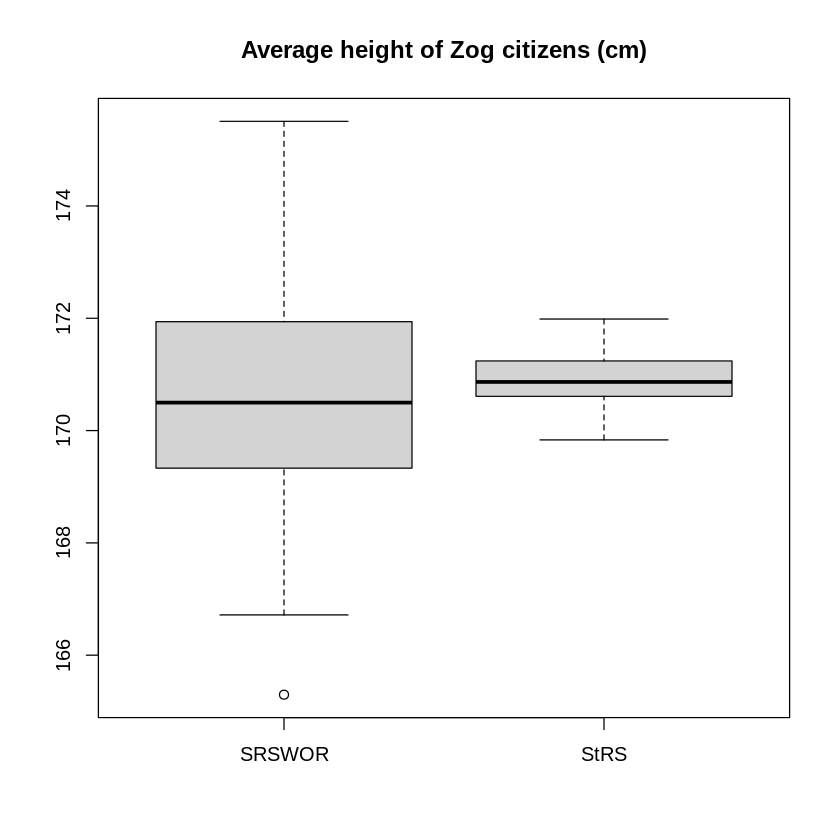

In [25]:
# From the below table, The Archie district has the highest average height whilst Rosie has the smallest average.
planetZog %>%
  group_by(District) %>%
  summarise(Mean = mean(Height), SD = sd(Height))

smplSize = 25
SRSWOR = StRS = numeric(100)
N = nrow(planetZog)

for(i in 1:100){
  planetZog %>%
    slice_sample(n = smplSize, replace = FALSE) %>%
    summarise(Mean = mean(Height)) %>%
    pull(Mean) -> SRSWOR[i]

  planetZog %>%
    group_by(District) %>%
    sample_n(size = ceiling(smplSize*n()/N)) %>%
    ungroup() %>%
    summarise(Mean = mean(Height)) %>%
    pull(Mean) -> StRS[i]
}

boxplot(cbind(SRSWOR = SRSWOR, StRS = StRS), main = "Average height of Zog citizens (cm)")
# From these two boxplots you can see that there is less variance in the stRs method wit most means sticking close

<details>
<summary>▶️ Click to show the solution</summary>

```r
Solution will be released at the end of the week!
```

### **Question 2**

An automotive battery producer makes a certain model of battery with an average life of 1110 days with a standard deviation of 80 days. Given a sample of size $n = 40$, find the probability that:

- The average battery for the sample is between 1100 and 1110 days.

In [36]:
# We know the population mean is 1110 days and population standard deviation of 80 days
# We also know that n > 40 means that our sampling distribution will approximate a normal distribution allowing us to find
# Pr(1100 < x < 1110) = Pr(1100 < Z < 1110)
n = 40
mean = 1110
sd = 80
pnorm((1110-mean)/(sd/sqrt(n))) - pnorm((1100-mean)/(sd/sqrt(n)))

[1] 0.2854023

<details>
<summary>▶️ Click to show the solution</summary>

```r
Solution will be released at the end of the week!
```

</details>

- The average battery life for the sample is greater than 1120 days

In [39]:
# Pr(x^- > 1120) = 1 - Pr(x^- < 1120)
1 - pnorm((1120-1100)/(80/sqrt(40)))

[1] 0.05692315

<details>
<summary>▶️ Click to show the solution</summary>


```r
Solution will be released at the end of the week!
```

</details>

### **Question 3**


A factory produces light bulbs, and historically, 5% of them are defective. To monitor quality, an inspector randomly selects 150 bulbs each day. Let $\hat{p}$ be the sample proportion of defective bulbs in a daily sample.  


- Use the CLT, approximate the sampling distribution of $\hat{p}$.  


In [ ]:
# No R code is required. Type your answer here
# As N is sufficently large
p^ ~ N(0.5, (0.05*0.95)/150)

<details>
<summary>▶️ Click to show the solution</summary>

```r
Solution will be released at the end of the week!
```



</details>

- Explain why the CLT approximation is reasonable in this context.

In [ ]:
# No R code is required. Type your answer here
# The CLT applies if np > 5 and n(1-p)> 5
np = 150 * 0.05 = 7.5 > 5
n(1-p) = 150 * 0.95 = 142.5 > 5

<details>
<summary>▶️ Click to show the solution</summary>

```r
Solution will be released at the end of the week!
```

</details>

- Compute the probability that the daily sample contains more than 10% defective bulbs.  


In [47]:
# Pr(p^ > 0.1)
Z = (0.10 - 0.05)/sqrt(0.05*0.95/150)
pnorm(Z, lower.tail = FALSE)

[1] 0.002478943

<details>
<summary>▶️ Click to show the solution</summary>

```r
Solution will be released at the end of the week!
```



</details>